<a href="https://colab.research.google.com/github/kareemrb27/Lab2.1/blob/master/Uplevel_Bagging_%26_Boosting_Live_Class_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging & Boosting Algorithms

# Section 1: Introduction

Let's use the same Wisconsin Breast Cancer Dataset (used in the previous class), a collection of features computed from digitized images of fine needle aspirate (FNA) of breast masses.

<center><img src="https://miro.medium.com/v2/resize:fit:1000/1*VooY3EOMyiA5smL3-s9Neg.png" width=500/></center>

Your goal is to develop a reliable classification model that can accurately predict whether a tumor is malignant or benign based on these features. The challenge is not just to build a model that performs well, but one that can provide insights and support in potentially life-saving decisions, helping to improve patient outcomes and streamline diagnostic processes.


### **Dataset Information:**


- **Origin**: Features are computed from digitized images of a fine needle aspirate (FNA) of a breast mass, specifically describing characteristics of the cell nuclei present in the image.

- **Reference**: The dataset is referenced in the paper by K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets," Optimization Methods and Software 1, 1992, 23-34.

- **Availability**:
  - **FTP**: The dataset is available through the UW CS FTP server:  
    `ftp ftp.cs.wisc.edu`  
    `cd math-prog/cpo-dataset/machine-learn/WDBC/`
  - **UCI Repository**: It is also available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

- **Attribute Information**:
  1. **ID Number**: Unique identifier for each instance.
  2. **Diagnosis**:
     - M = Malignant (cancerous)
     - B = Benign (non-cancerous)
  3. **Features**:
     - **Radius**: Mean of distances from center to points on the perimeter.
     - **Texture**: Standard deviation of gray-scale values, representing variations in smoothness or roughness.
     - **Perimeter**: Length of the boundary of the cell nucleus.
     - **Area**: Size of the cell nucleus.
     - **Smoothness**: Local variation in radius lengths, indicating the smoothness of the cell edge.
     - **Compactness**: Defined as \((\text{perimeter}^2 / \text{area}) - 1.0\), reflecting the compactness of the cell nuclei.
     - **Concavity**: Severity of concave portions of the contour.
     - **Concave Points**: Number of concave portions in the contour.
     - **Symmetry**: Symmetry of the cell nuclei.
     - **Fractal Dimension**: The "coastline approximation," which measures the roughness of the cell boundary.

- **Computation of Features**:
  - Each feature is computed in three ways:
    1. **Mean**: Average value for each feature across all cell nuclei in the image.
    2. **Standard Error (SE)**: Standard deviation of each feature, indicating variation or spread.
    3. **Worst**: The largest value observed for each feature, calculated as the mean of the three largest values.

- **Total Features**: 30 features in total, derived from the above calculations (mean, SE, and worst) for each of the 10 core features.

- **Class Distribution**:
  - **Benign**: 357 samples
  - **Malignant**: 212 samples

- **Data Characteristics**:
  - All feature values are recorded with four significant digits.
  - **Missing Values**: None



# Section 2: Data Preparation

In [ ]:
# Import the necessary libraries
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning model metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report,
                             precision_score, recall_score, f1_score,
                             confusion_matrix)


# Setting maximum limit of the number of columns visible
pd.set_option('display.max_columns', 100)

In [ ]:
# Load data from the csv file
data = pd.read_csv('data.csv')

# View the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Drop the unwanted columns
data.drop(columns=['id','Unnamed: 32'],inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Check the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Here is the code for the EDA & data preprocessing steps performed last week.
*Note: For a detailed explanation of these steps, please refer to the previous class(Classification Algorithms 2) notebook.*

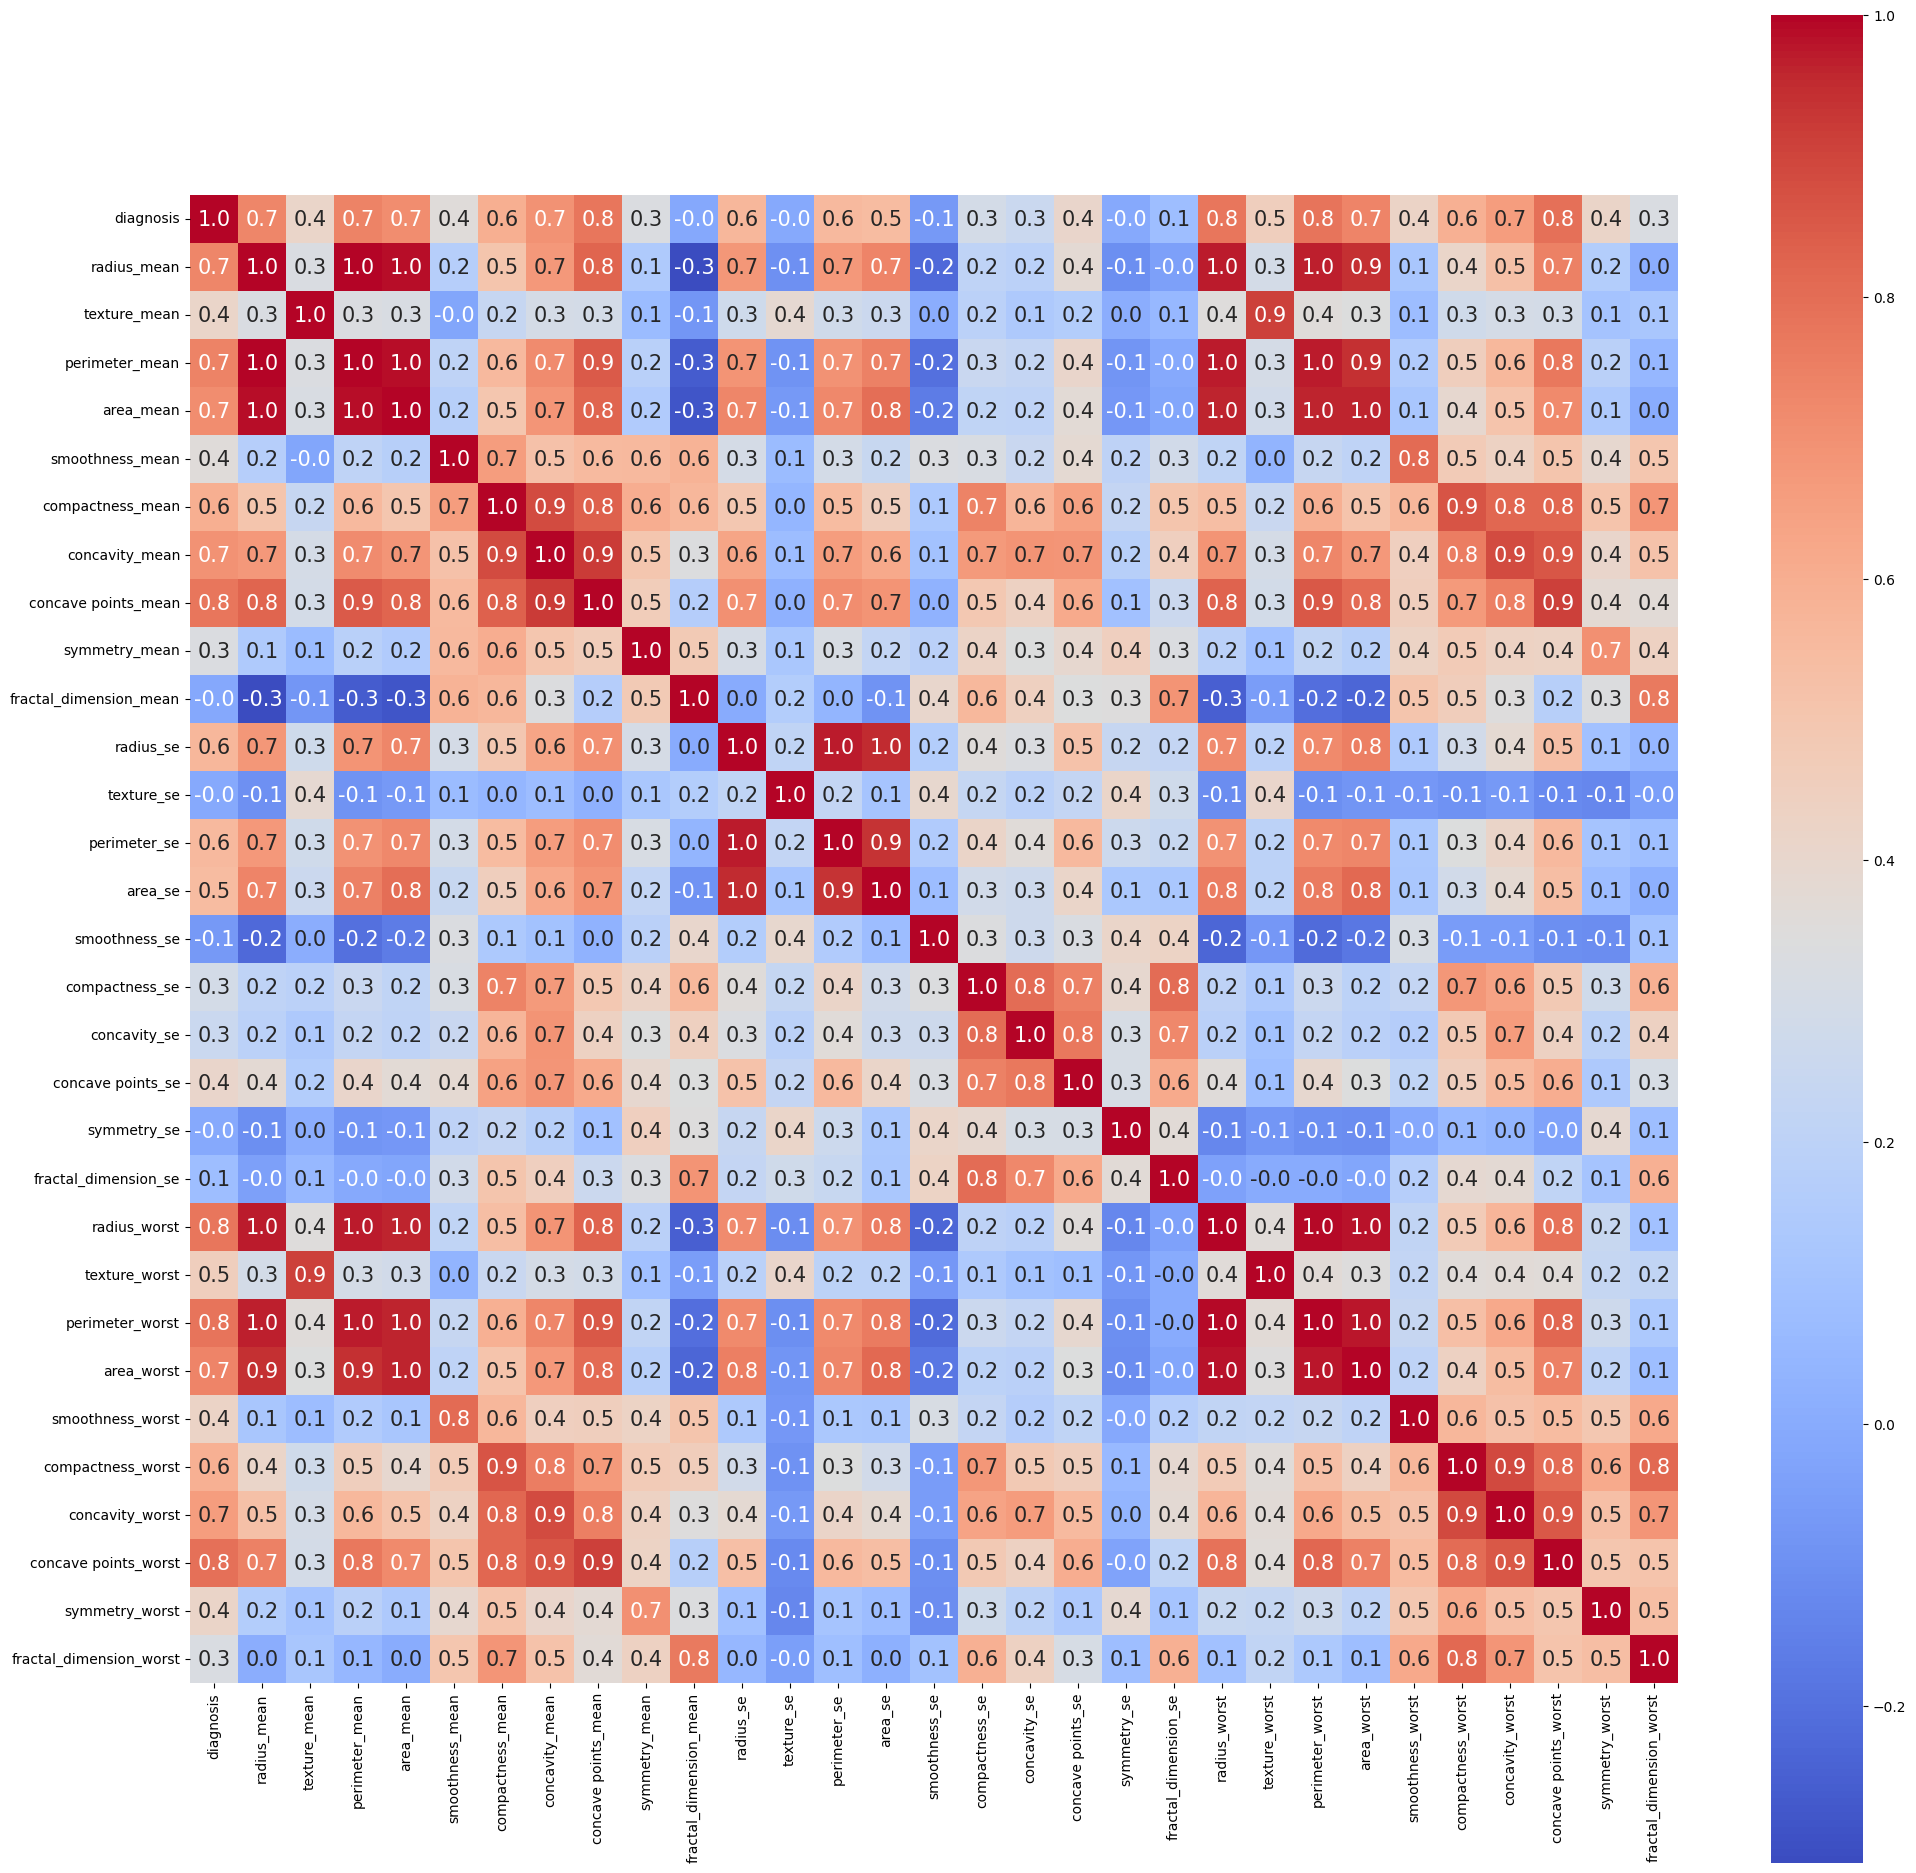

In [ ]:
# EDA steps discussed last week
# Checking class imbalance
data.diagnosis.value_counts(normalize=True)

# Encoding the target variable
data['diagnosis'] = np.where(data['diagnosis'] == 'M', 1, 0)

# Finding out the correlation between the features
# Find the correlation
corr = data.corr()
corr.shape
# Plotting the heatmap of correlation between features
plt.figure(figsize=(24,24))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='coolwarm')
plt.show()

### Interpretations made last week:
- The dataset suffers from class imbalance.
- There is multicollinearity problem in the data.

### <i> Note:
### What is class imbalance?
Class imbalance occurs when the distribution of classes in a dataset is uneven, with one class significantly outnumbering the others. This can lead to biased models that favor the majority class, often resulting in poor performance on the minority class.

### What is multicollinearity?
Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, leading to redundancy and potentially unreliable estimates of the model coefficients. This can make it difficult to determine the individual effect of each variable on the dependent variable.</i>

# Section 3: Model Building


## 3.1 Bagging Algorithms
Bagging, or Bootstrap Aggregating, is an ensemble learning technique that improves the accuracy and stability of machine learning models. It works by generating multiple subsets of the original dataset through random sampling with replacement, training a model on each subset, and then combining the predictions of these models (usually by averaging or majority voting) to produce the final prediction.

<center><img src="https://payload-cms.code-b.dev/media/Bagging.png" width=500/></center>

Example: Consider a decision tree model for predicting whether a student will pass or fail based on various features like study hours and attendance. Instead of training a single decision tree, bagging creates multiple subsets of the training data, builds a decision tree on each subset, and then averages the predictions of all the trees. This reduces the variance and helps prevent overfitting, leading to a more robust and accurate model.

## 3.1.1 Random Forest Algorithm
Random Forest is a type of bagging (Bootstrap Aggregating) algorithm.

In Random Forest, the core idea of bagging is applied by creating multiple decision trees using different bootstrap samples (random subsets of the original dataset created by sampling with replacement). Additionally, Random Forest introduces extra randomness by selecting a random subset of features at each split in the decision tree, which helps in reducing correlation among the trees and improving the model's performance.

### How Random Forest Works:
1. **Dataset Sampling:**
The algorithm creates multiple subsets of the original dataset by randomly sampling with replacement (bootstrap sampling). This means that some data points may appear multiple times in a subset, while others may not appear at all.

2. **Tree Building:**
For each subset, a decision tree is built. However, unlike standard decision trees, each node in a tree is split based on a random subset of features, not all features. This randomness helps in making the trees less correlated.

3. **Tree Prediction:**
Once all trees are built, each tree in the forest makes a prediction when a new data point is input. For classification, each tree votes for a class, and the class with the most votes becomes the final prediction. For regression, the average of all tree predictions is taken as the final output.

4. **Final Prediction:**
The algorithm aggregates the predictions of all individual trees to produce the final result, which is more accurate and robust than what would be achieved with a single decision tree.

<center><img src="https://miro.medium.com/v2/resize:fit:1010/1*R3oJiyaQwyLUyLZL-scDpw.png" width=500/></center>


### 3.1.1.1 Vanilla Random Forest Classifier

In [ ]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Separate features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Interpretation:

Random Forest Model gives good accuracy, precision and recall for both the classes inspite of class imbalance.

Let's check the importance of the features.

In [ ]:
# Feature importance with feature names
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to show feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


                    Feature  Importance
23               area_worst    0.153892
27     concave points_worst    0.144663
7       concave points_mean    0.106210
20             radius_worst    0.077987
6            concavity_mean    0.068001
22          perimeter_worst    0.067115
2            perimeter_mean    0.053270
0               radius_mean    0.048703
3                 area_mean    0.047555
26          concavity_worst    0.031802
13                  area_se    0.022407
21            texture_worst    0.021749
25        compactness_worst    0.020266
10                radius_se    0.020139
5          compactness_mean    0.013944
1              texture_mean    0.013591
12             perimeter_se    0.011303
24         smoothness_worst    0.010644
28           symmetry_worst    0.010120
16             concavity_se    0.009386
4           smoothness_mean    0.007285
19     fractal_dimension_se    0.005321
15           compactness_se    0.005253
29  fractal_dimension_worst    0.005210


### Interpretation:
- The most influential features in the model are `area_worst`, `concave points_worst`, and `concave points_mean`, indicating that worst-case measurements of area and concave points, along with their mean, are critical in driving predictions.

### 3.1.1.2 Hyperparameter Tuning of a Random Forest Model

Hyperparameter tuning is the process of selecting the optimal set of hyperparameters for a machine learning model. Hyperparameters are the parameters that govern the learning process and model configuration, such as learning rate, number of trees in a Random Forest, etc. Unlike model parameters, which are learned during training, hyperparameters are set before the learning process begins.

<center><img src="https://pub.mdpi-res.com/algorithms/algorithms-16-00293/article_deploy/html/images/algorithms-16-00293-g001.png?1686218411" width=500/></center>

In [ ]:
# Define the hyperparameters
n_estimators = [5,20,50,100] # Number of trees in the forest
max_features = ['auto', 'sqrt'] # Number of features to consider at each split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # Maximum depth of each tree
min_samples_split = [2, 6, 10] # Minimum number of samples required to split an internal node
min_samples_leaf = [1, 3, 4] # Minimum number of samples required to be at a leaf node
bootstrap = [True, False] # Method for sampling data points (True for bootstrap sampling, False otherwise)

In [ ]:
# Define the hyperparameter grid for Random Forest
random_grid = {
    'n_estimators': n_estimators,           # Number of trees in the forest
    'max_features': max_features,           # Number of features to consider at each split
    'max_depth': max_depth,                 # Maximum depth of each tree
    'min_samples_split': min_samples_split, # Minimum number of samples required to split an internal node
    'min_samples_leaf': min_samples_leaf,   # Minimum number of samples required to be at a leaf node
    'bootstrap': bootstrap                  # Method for sampling data points (True for bootstrap sampling, False otherwise)
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the Random Forest model
model = RandomForestClassifier()

# Set up the RandomizedSearchCV with the Random Forest model and hyperparameter grid
rf_random = RandomizedSearchCV(
    estimator = model,                     # The model to tune (Random Forest in this case)
    param_distributions = random_grid,     # The hyperparameter grid to sample from
    n_iter = 100,                          # Number of different combinations to try (iterations)
    cv = 5,                                # Number of folds for cross-validation
    verbose = 2,                           # Controls the verbosity: higher numbers give more details
    random_state = 35,                     # Ensures reproducibility by setting a random seed
    n_jobs = -1                            # Utilizes all available processors for parallel computation
)


In [ ]:
# Perform the hyperparameter search on the training data
rf_random.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
235 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
143 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
# Print the hyperparameter grid that was used for RandomizedSearchCV
print('Random grid: ', random_grid, '\n')

# Print the best hyperparameters found by RandomizedSearchCV
print('Best Parameters: ', rf_random.best_params_, '\n')


Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False} 



Accuracy: 0.960 (0.029)


<ipython-input-13-967ced65918e>:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n_scores)


<Axes: ylabel='Density'>

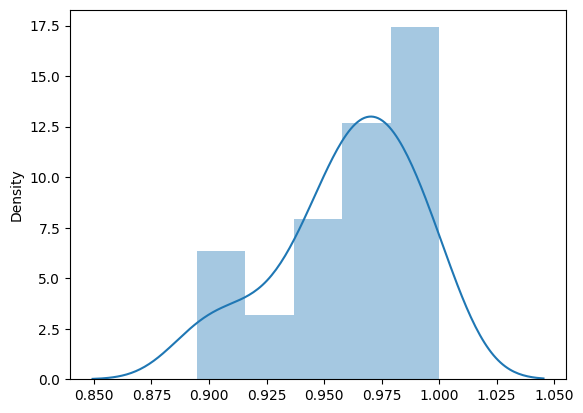

In [ ]:
# Import necessary modules
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Extract the best parameters from RandomizedSearchCV
best_params = rf_random.best_params_

# Initialize the best model with the best hyperparameters from RandomizedSearchCV
best_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],            # Best number of trees
    min_samples_split=best_params['min_samples_split'],  # Best min samples required to split an internal node
    min_samples_leaf=best_params['min_samples_leaf'],    # Best min samples required at a leaf node
    max_features=best_params['max_features'],            # Best number of features to consider at each split
    max_depth=best_params['max_depth'],                  # Best maximum depth of each tree
    bootstrap=best_params['bootstrap']                   # Best bootstrap sampling setting
)

# Set up the cross-validation method with repeated stratified k-fold
cv = RepeatedStratifiedKFold(
    n_splits=10,                # Number of folds in each round of cross-validation
    n_repeats=3,                # Number of times the cross-validation process is repeated
    random_state=1              # Ensures reproducibility by setting a random seed
)

# Evaluate the model using cross-validation
n_scores = cross_val_score(
    best_model,                 # The model to evaluate
    X,                          # Features dataset
    y,                          # Target labels
    scoring='accuracy',         # Scoring metric to use (accuracy in this case)
    cv=cv,                      # Cross-validation strategy
    n_jobs=-1,                  # Utilize all available processors for parallel computation
    error_score='raise'         # Raise an error if a problem occurs during scoring
)

# Report the performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Plot the distribution of cross-validation scores
sns.distplot(n_scores)


### Interpretation:
- The majority of the cross-validation accuracy scores are clustered between 0.95 and 1.0, indicating that the model consistently performs well.
- The distribution is slightly right-skewed, with a peak around 0.97, showing that most of the model's predictions are very close to perfect accuracy.

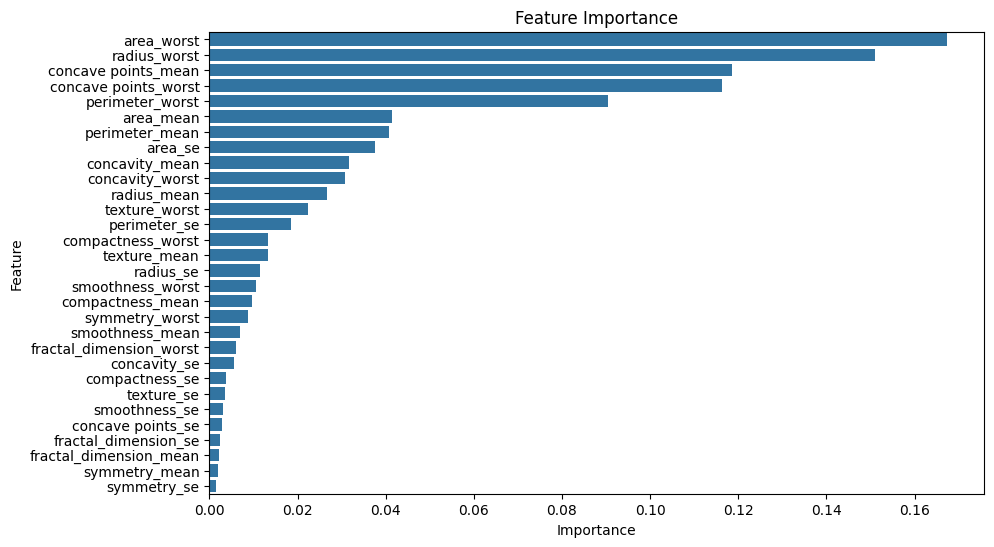

In [ ]:
# Fit the best model to the entire dataset
best_model.fit(X, y)

def plot_feature_importance(X, model):
    # Extract feature importances
    importances = model.feature_importances_
    # Get feature names
    feature_names = X.columns

    # Create a Series with feature names as the index
    feature_importance_series = pd.Series(importances, index=feature_names)

    # Sort the Series by importance
    feature_importance_series = feature_importance_series.sort_values(ascending=False)

    # Plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance_series, y=feature_importance_series.index)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.show()

# Plot the feature importance based on the fitted model
plot_feature_importance(X, best_model)

### Interpretation:

- The most important features driving the model’s predictions are `area_worst`, `perimeter_worst`, and `radius_worst`, indicating that the worst-case measurements of these factors are crucial for the model.
-Features like `symmetry_se`, `symmetry_mean`, and `concave points_se` have minimal importance, contributing little to the model’s overall predictive power.
<hr><hr>

## 3.2 Boosting Algorithms
Boosting is an ensemble machine learning technique that aims to improve the performance of weak learners (typically simple models like decision trees) by combining them into a stronger model. Unlike bagging, where multiple models are trained independently and their predictions are averaged, boosting trains models sequentially, where each new model attempts to correct the errors made by the previous ones.

<center><img src="https://miro.medium.com/v2/resize:fit:1050/1*4XuD6oRrgVqtaSwH-cu6SA.png" width=500/></center>

Example: Consider a decision tree model used to predict whether a student will pass or fail based on features like study hours and attendance. In a boosting approach, the first decision tree is trained and might misclassify some students, perhaps underestimating the impact of study hours. The next tree in the sequence is then built to focus specifically on correcting these mistakes, giving more attention to the students who were misclassified. This process continues, with each new tree addressing the errors of the previous ones. Finally, the predictions from all the trees are combined to produce a final, more accurate prediction. This step-by-step correction reduces errors and creates a model that is more precise and capable of handling difficult cases better than any single decision tree on its own.

### 3.2.1 Adaboost Algorithm
AdaBoost (Adaptive Boosting) is an ensemble learning technique that improves the accuracy of machine learning models by combining multiple "weak" learners into a single "strong" learner.
- It works by training a sequence of simple models, where each model focuses more on the data points that were incorrectly classified by the previous ones. - In each step, AdaBoost adjusts the weights of the data points: it increases the weights of the misclassified points, making the next model pay more attention to these harder-to-classify instances.
- The final prediction is made by combining the predictions of all the models, with each model's contribution weighted based on its accuracy.
- This process results in a more accurate and robust model that can better handle complex datasets.

<center><img src="https://miro.medium.com/v2/resize:fit:748/1*qzIPSA-HQlefxxZnPlb-2w.png" width=500/></center>

In [ ]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a Decision Tree Classifier as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize the AdaBoost classifier with the base estimator
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the AdaBoost model
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print a detailed classification report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



### Interpretation:
- The model performs great for both the classes.

### 3.2.2 Gradient Boosting Algorithm

Gradient Boosting is an ensemble machine learning technique that builds a strong predictive model by combining the outputs of multiple weak learners, typically decision trees, in a sequential manner. The key idea is to iteratively improve the model by focusing on the errors (residuals) made by previous models.

<center><img src="https://www.researchgate.net/publication/351542039/figure/fig1/AS:11431281172877200@1688685833363/Flow-diagram-of-gradient-boosting-machine-learning-method-The-ensemble-classifiers.png" width=500/></center>

### How Gradient Boosting Works:

1. **Initialize the Model**: The process begins with an initial prediction, which could be as simple as the average of the target values for regression tasks. For classification, it might start with a simple model that assigns equal probability to each class.

2. **Calculate Residuals**: After making the initial prediction, the difference between the actual values and the predicted values (residuals) is calculated. These residuals represent the errors made by the model.

3. **Fit a Weak Learner**: A new weak learner (typically a decision tree with shallow depth) is trained to predict the residuals. The idea is that this learner will focus on correcting the errors made by the previous model.

4. **Update the Model**:The predictions from the weak learner are scaled by a learning rate (a small constant value) and then added to the previous model’s predictions. This updated model now includes the corrections made by the new weak learner.

5. **Repeat the Process**: Steps 2-4 are repeated for a specified number of iterations or until the model performance no longer improves. With each iteration, a new weak learner is added to the ensemble, focusing on the residual errors of the combined model so far.

6. **Final Prediction**: The final model is the sum of the predictions from all the weak learners, each weighted by the learning rate. This ensemble model usually performs much better than any individual weak learner.





In [ ]:
# Import the library
from sklearn.ensemble import GradientBoostingClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=100,       # Number of boosting stages (trees)
    learning_rate=0.1,      # Step size shrinkage used to prevent overfitting
    max_depth=3,            # Maximum depth of individual trees
    random_state=42         # Seed for reproducibility
)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print a detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



### Interpretation:
- The model achieved an accuracy of 96%, indicating that it correctly classified 96% of the test samples.

- Both precision and recall are high across the classes, with f1-scores close to 1.0, reflecting a well-balanced model that performs consistently well.